# Import necessary libraries

In [16]:
import numpy as np
import random
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Input,Dropout

# Load Dataset

### Load training and testing data from CSV files

In [2]:
X_train = np.loadtxt('input.csv', delimiter=',')
Y_train = np.loadtxt('labels.csv', delimiter=',')
X_test = np.loadtxt('input_test.csv', delimiter=',')
Y_test = np.loadtxt('labels_test.csv', delimiter=',')

# Reshape the dataset to match the expected input shape for the model

In [3]:
X_train = X_train.reshape(len(X_train), 100, 100, 3)  # 100x100 RGB images
Y_train = Y_train.reshape(len(Y_train), 1)            # Reshape labels
X_test = X_test.reshape(len(X_test), 100, 100, 3)
Y_test = Y_test.reshape(len(Y_test), 1)

# Normalize the input data to range [0, 1]

In [4]:
X_train = X_train / 255.0
X_test = X_test / 255.0

# Display the shapes of the datasets

In [5]:
print("Shape of X_train: ", X_train.shape)
print("Shape of Y_train: ", Y_train.shape)
print("Shape of X_test: ", X_test.shape)
print("Shape of Y_test: ", Y_test.shape)

Shape of X_train:  (2000, 100, 100, 3)
Shape of Y_train:  (2000, 1)
Shape of X_test:  (400, 100, 100, 3)
Shape of Y_test:  (400, 1)


# Visualize a random training image

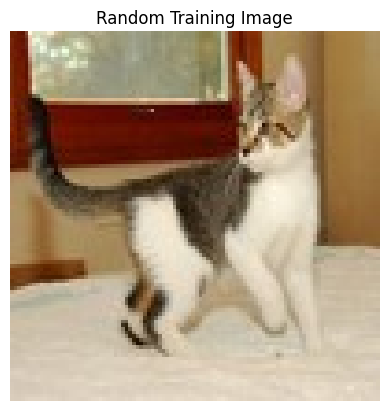

In [7]:
idx = random.randint(0, len(X_train) - 1)
plt.imshow(X_train[idx, :])
plt.title("Random Training Image")
plt.axis('off')
plt.show()

# Build the CNN Model

In [34]:
model = Sequential([
    Input(shape=(100, 100, 3)),    # Input layer
    Conv2D(32, (3, 3), activation='relu'),  # First convolutional layer
    MaxPooling2D((2, 2)),           # First max pooling layer
    
    Conv2D(32, (3, 3), activation='relu'),  # Second convolutional layer
    MaxPooling2D((2, 2)),           # Second max pooling layer

    Flatten(),                       # Flatten the output for the dense layer
    Dense(64, activation='relu'),  # Dense layer with 64 neurons          
    Dense(1, activation='sigmoid')   # Output layer for binary classification
])

# Compile the model

In [35]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model

In [36]:
model.fit(X_train, Y_train, epochs=5, batch_size=64)

Epoch 1/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 6s 136ms/step - accuracy: 0.4952 - loss: 0.7465
Epoch 2/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 4s 135ms/step - accuracy: 0.5789 - loss: 0.6748
Epoch 3/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 4s 134ms/step - accuracy: 0.6437 - loss: 0.6287
Epoch 4/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 4s 135ms/step - accuracy: 0.7472 - loss: 0.5217
Epoch 5/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 4s 136ms/step - accuracy: 0.7886 - loss: 0.4538


# Evaluate the model on test data

In [37]:
evaluation_results = model.evaluate(X_test, Y_test)
print("Test Accuracy: {:.2f}%".format(evaluation_results[1] * 100))

13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - accuracy: 0.7545 - loss: 0.4720
Test Accuracy: 67.75%


# Making predictions

### Visualize a random test image

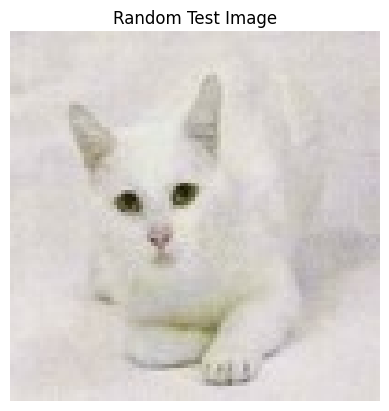

In [86]:
idx2 = random.randint(0, len(Y_test) - 1)
plt.imshow(X_test[idx2, :])
plt.title("Random Test Image")
plt.axis('off')
plt.show()


# Predict the class of the random test image

In [87]:
y_pred = model.predict(X_test[idx2, :].reshape(1, 100, 100, 3))
print(y_pred)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
[[0.63319373]]


# Determine the predicted class

In [88]:
if y_pred >= 0.5:
    pred= 'cat'
else:
    pred= 'dog'
print("Our model says it is a:", pred)

Our model says it is a: cat
